# 0. Description & Targets
Целевые действия:
'sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'

Реклама в социальных сетях — все визиты с ga_sessions.utm_source in
('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm').


#### - Проведите проверку следующих гипотез:
1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события


#### - Ответьте на вопросы продуктовой команды:
1. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

# 1.Data preparation

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# df_hits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1aWTUBZoxDctNs-ldqEw-9dw0X2zR9upd')
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_hits_usable = df_hits[['session_id', 'event_action', 'hit_page_path']]
df_hits_usable.head()

,session_id,event_action,hit_page_path
0,5639623078712724064.1640254056.1640254056,quiz_show,sberauto.com/cars?utm_source_initial=google&ut...
1,7750352294969115059.1640271109.1640271109,quiz_show,sberauto.com/cars/fiat?city=1&city=18&rental_c...
2,885342191847998240.1640235807.1640235807,quiz_show,sberauto.com/cars/all/volkswagen/polo/e994838f...
3,142526202120934167.1640211014.1640211014,quiz_show,sberauto.com/cars?utm_source_initial=yandex&ut...
4,3450086108837475701.1640265078.1640265078,quiz_show,sberauto.com/cars/all/mercedes-benz/cla-klasse...


In [4]:
df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])


C:\Users\NA_PC\AppData\Local\Temp\ipykernel_224\1655697762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',


In [5]:
df_hits_usable = pd.pivot_table(df_hits_usable,
               index=["session_id"],
               values=["target", "hit_page_path"],
               aggfunc={"target": sum, "hit_page_path": 'first'}
               ).reset_index()

In [6]:
# df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_224\3424410790.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [127]:
# df_sessions_usable = df_sessions[['session_id', 'utm_source', 'utm_medium', 'device_category', 'geo_country', 'geo_city', 'device_os', 'device_brand', 'device_model']]
df_sessions_usable = df_sessions.drop(columns=['client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_adcontent', 'utm_keyword', 'device_screen_resolution'])
df_sessions_usable.head()

,session_id,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Android,Huawei,NaN,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Android,Huawei,NaN,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow


In [128]:
df_sessions_usable.shape

(1860042, 11)

In [129]:
df_hits_usable.shape

(1734610, 3)

In [130]:
print(df_sessions_usable.session_id.nunique())
print(df_hits_usable.session_id.nunique())

1860042
1734610


данные объединяет значения столбца session_id 
сделаем общую таблицу только в которую войдут только строки где session_id присутствует в обоих таблицах

In [173]:
df_united = pd.merge(df_hits_usable, df_sessions_usable)
df_united.head()

,session_id,hit_page_path,target,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/faq?utm_source_initial=y...,0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,NaN,Samsung,NaN,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,podpiska.sberauto.com/,0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Android,Samsung,NaN,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,podpiska.sberauto.com/,0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,NaN,Realme,NaN,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,sberauto.com/cars/https://sberauto.com/cars/b8...,0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,NaN,Apple,NaN,Safari,Russia,Moscow


In [132]:
df_united.shape

(1732266, 13)

In [133]:
df_united.describe(include='all')

,session_id,hit_page_path,target,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
count,1732266,1732266,1.732266e+06,1732190,1732266,1536979,1732266,718302,1385070,15062,1732266,1732266,1732266
unique,1732266,209101,NaN,280,55,406,3,13,200,104,55,159,2389
top,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,Chrome,Russia,Moscow
freq,1,924950,NaN,552555,525206,422992,1368679,425520,503533,9018,951573,1682423,750928
mean,NaN,NaN,5.936848e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.999437e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.EDA
Разведочный анализ данных (Exploratory Data Analysis)

## 2.1 Data cleaning

In [174]:
df_united_clean = df_united.copy()
df_united_clean.shape

(1732266, 13)

In [175]:
df_united_clean.duplicated().value_counts()

False    1732266
dtype: int64

#### Fullness of cells

In [136]:
def print_useful_rows_info(df):
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [137]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 14194
Persentage of filled rows 0.82


In [138]:
def blank_rows_percentage(df):
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [139]:
blank_rows_percentage(df_united_clean)

device_model       99.130503
device_os          58.533966
device_brand       20.042880
utm_campaign       11.273500
utm_source          0.004387
session_id          0.000000
hit_page_path       0.000000
target              0.000000
utm_medium          0.000000
device_category     0.000000
device_browser      0.000000
geo_country         0.000000
geo_city            0.000000
dtype: float64


удаляем все колонки где пропусков больше 20%:

In [176]:
df_united_clean = df_united_clean.drop(columns=['device_model', 'device_os', 'device_brand', 'session_id'], axis=1)

In [177]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1536903
Persentage of filled rows 88.72


<AxesSubplot:>

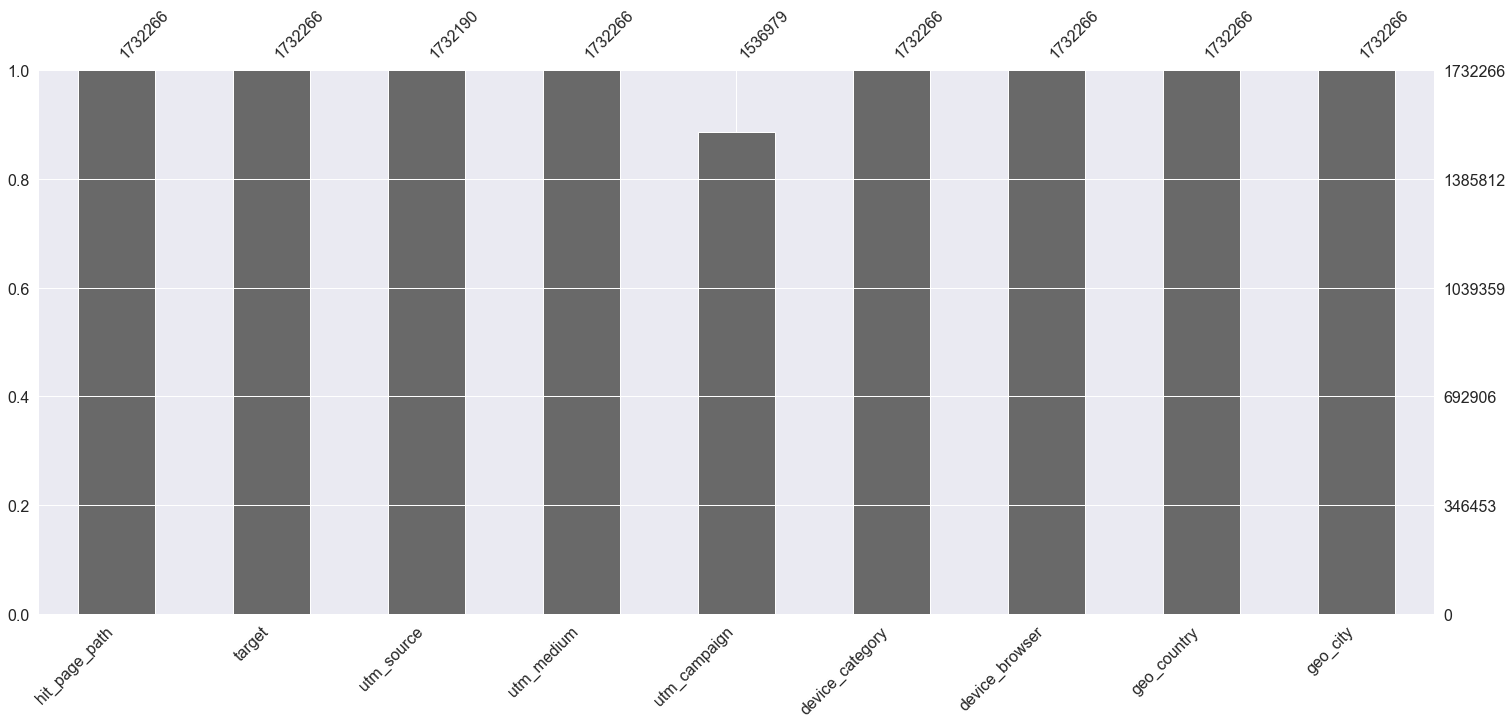

In [178]:
# диаграмма заполненности
msno.bar(df_united_clean)

### Заполнение пропусков

In [179]:
df_united_clean.utm_campaign.describe()

count                  1536979
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                    422992
Name: utm_campaign, dtype: object

заполним как 'other'

In [180]:
df_united_clean.utm_campaign = df_united_clean.utm_campaign.fillna('other')

In [181]:
df_united_clean.utm_source.isna().sum()

76

Удалим строки с 'nan'

In [182]:
df_united_clean = df_united_clean[df_united_clean.utm_source.notna()]

In [183]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1732190
Persentage of filled rows 100.0


Преобразование содержимого столбцов

In [184]:
df_united_clean.hit_page_path.values[10]
df_united_clean[df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False)]
df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False).value_counts()

False    1511479
True      220711
Name: hit_page_path, dtype: int64

In [185]:
df_united_clean['car_brand'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[3] if '/cars/all/' in x else 'empty')
df_united_clean['car_model'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[4] if '/cars/all/' in x else 'empty')
df_united_clean = df_united_clean.drop(columns=['hit_page_path'])

In [32]:
# df_united_clean['visit_datetime'] = pd.to_datetime(df_united_clean.visit_date + ' ' + df_united_clean.visit_time)
# df_united_clean = df_united_clean.drop(columns=['visit_date', 'visit_time'])

In [33]:
# df_united_clean['device_screen_length'] = df_united_clean.device_screen_resolution.apply(lambda x: int(x.split('x')[0]))
# df_united_clean['device_screen_width'] = df_united_clean.device_screen_resolution.apply(lambda x: int(x.split('x')[1]))
# df_united_clean = df_united_clean.drop(columns=['device_screen_resolution'])

In [186]:
df_united_clean['from_smm'] = df_united_clean.utm_source.apply(lambda x: 1 if x in ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm'] else 0)
df_united_clean = df_united_clean.drop(columns=['utm_source'])

Автоподписка работает только по РФ поэтому удаляем все остальные страны из датасета

In [188]:
df_united_clean = df_united_clean[df_united_clean.geo_country == 'Russia']
df_united_clean = df_united_clean.drop(columns = ['geo_country'], axis=1)

In [189]:
df_united_clean = df_united_clean.rename(columns={'geo_city': 'city'})

In [190]:
df_united_clean['target'] = df_united_clean.target.apply(lambda x: 1 if x > 0 else 0)

In [191]:
df_united_clean.device_category = df_united_clean.device_category.astype('category')
df_united_clean.utm_medium = df_united_clean.utm_medium.astype('category')
df_united_clean.utm_campaign = df_united_clean.utm_campaign.astype('category')
df_united_clean.device_browser = df_united_clean.device_browser.astype('category')
df_united_clean.city = df_united_clean.city.astype('category')
df_united_clean.car_brand = df_united_clean.car_brand.astype('category')
df_united_clean.car_model = df_united_clean.car_model.astype('category')

### Определение типов переменных в датасете df_united

|  Переменная               | Дискретная | Непрерывная | Качественная |
|---------------------------|------------|-------------|--------------|
| from_smm                  |            |             | X            |
| utm_medium                |            |             | X            |
| utm_campaign              |            |             | X            |
| device_category           |            |             | X            |
| device_browser            |            |             | X            |
| city                      |            |             | X            |
| car_brand                 |            |             | X            |
| car_model                 |            |             | X            |
| target(целевая)           |            |             | X            |

In [233]:
df_united_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682347 entries, 0 to 1682346
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   index            1682347 non-null  int64   
 1   target           1682347 non-null  int64   
 2   utm_medium       1682347 non-null  category
 3   utm_campaign     1682347 non-null  category
 4   device_category  1682347 non-null  category
 5   device_browser   1682347 non-null  category
 6   city             1682347 non-null  category
 7   car_brand        1682347 non-null  category
 8   car_model        1682347 non-null  category
 9   from_smm         1682347 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 53.0 MB


Exploring

In [193]:
df_united_clean.car_brand.nunique()

21

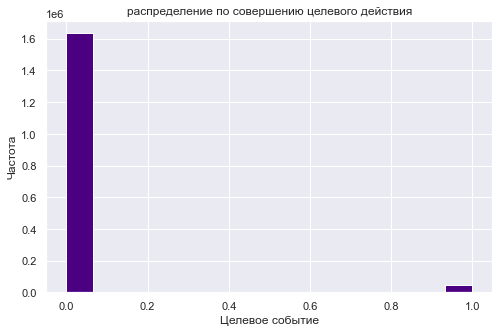

In [194]:
plt.figure(figsize=(8, 5))
plt.hist(df_united_clean.target, bins=15, color='indigo')
plt.xlabel('Целевое событие')
plt.ylabel('Частота')
plt.title('распределение по совершению целевого действия');

### Визуализация категориальных переменных

In [195]:
df_car_brand_amount = df_united_clean[df_united_clean.car_brand != 'empty'].groupby(['car_brand'], as_index=False).index.count().rename(columns={'index': 'amount'})
df_car_brand_amount

,car_brand,amount
0,audi,3327
1,bmw,10972
2,empty,0
3,haval,2788
4,honda,5
5,hyundai,1126
6,infiniti,4
7,kia,12797
8,lada-vaz,26563
9,land-rover,1370


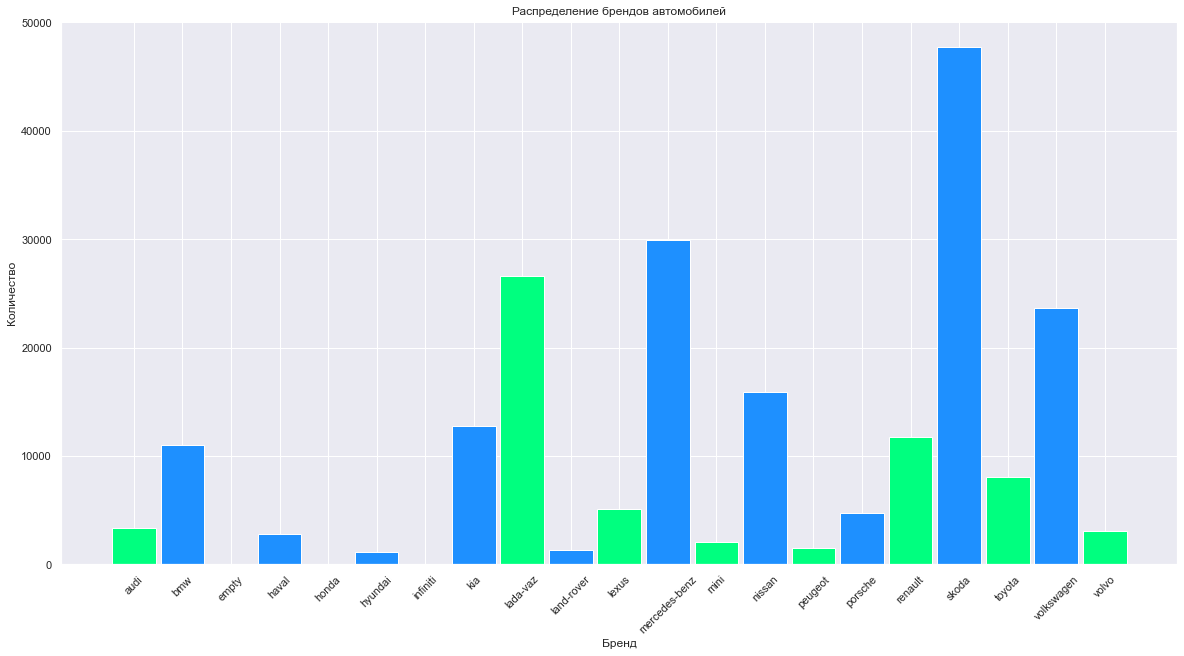

In [196]:
plt.figure(figsize=(20, 10))
plt.bar(df_car_brand_amount.car_brand, df_car_brand_amount.amount, color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=45)
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.title('Распределение брендов автомобилей');

In [204]:
df_city_amount = df_united_clean[df_united_clean.city != '(not set)'].groupby(['city'], as_index=False).index.count().rename(columns={'index': 'amount'}).sort_values(by='amount', ascending=False)
df_city_amount.describe()

,amount
count,505.000000
mean,3201.172277
std,35724.043999
min,0.000000
25%,21.000000
50%,113.000000
75%,713.000000
max,750873.000000


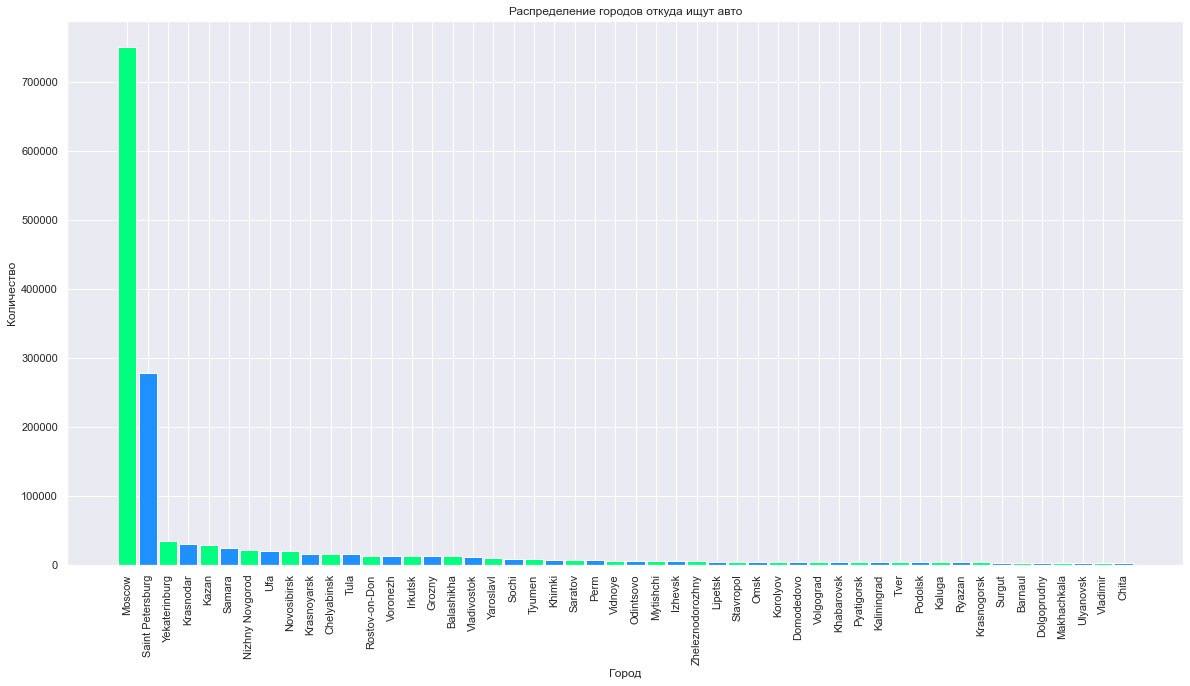

In [211]:

plt.figure(figsize=(20, 10))
plt.bar(df_city_amount.city.head(50), df_city_amount.amount.head(50), color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=90)
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Распределение городов откуда ищут авто');

In [209]:
df_united_clean.device_browser.unique()

['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser', 'Edge', ..., 'com.zhiliaoapp.musically', 'Konqueror', 'Iron', 'Threads 202.0.0.23.119', '(not set)']
Length: 30
Categories (30, object): ['(not set)', 'Amazon Silk', 'Android Browser', 'Android Webview', ..., '[FBAN', 'com.vk.vkclient', 'com.zhiliaoapp.musically', 'helloworld']

In [210]:
df_device_browser_amount = df_united_clean[df_united_clean.device_browser != '(not set)'].groupby(['device_browser'], as_index=False).index.count().rename(columns={'index': 'amount'}).sort_values(by='amount', ascending=False)


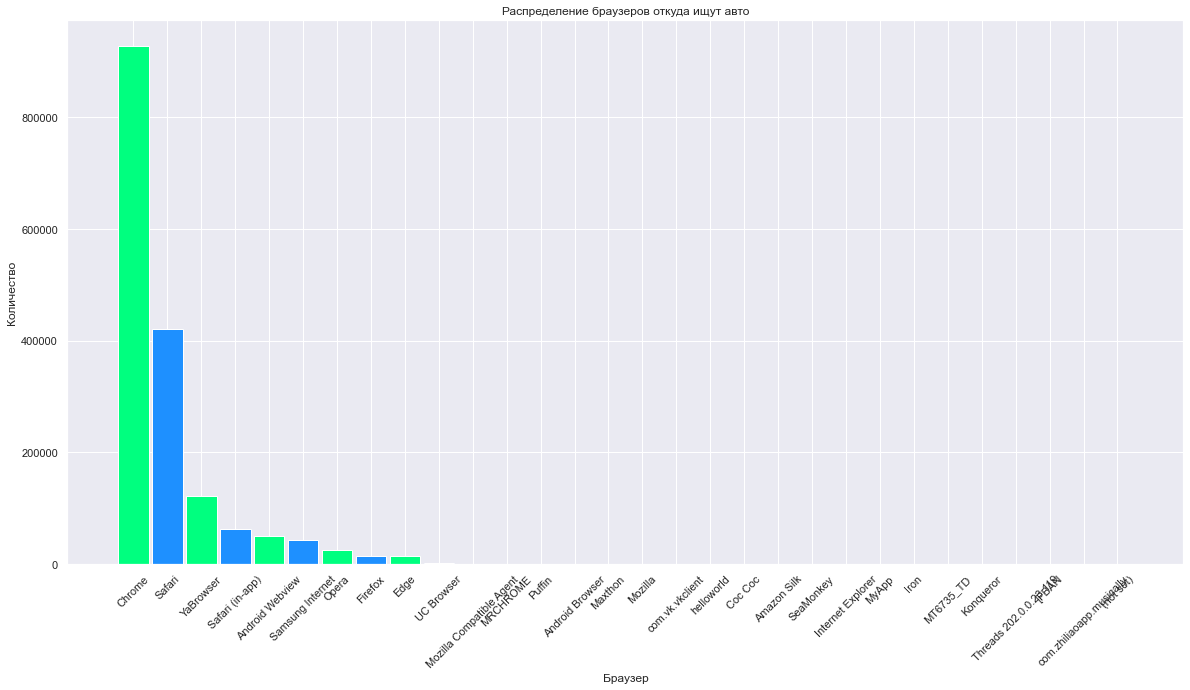

In [214]:
plt.figure(figsize=(20, 10))
plt.bar(df_device_browser_amount.device_browser, df_device_browser_amount.amount, color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=45)
plt.xlabel('Браузер')
plt.ylabel('Количество')
plt.title('Распределение браузеров откуда ищут авто');

In [215]:

df_united_clean.device_category.unique()

['mobile', 'desktop', 'tablet']
Categories (3, object): ['desktop', 'mobile', 'tablet']

In [220]:
df_device_category_amount = df_united_clean.groupby(['device_category'], as_index=False).index.count() \
                .rename(columns={'index': 'amount'})
df_device_category_amount

,device_category,amount
0,desktop,332991
1,mobile,1333547
2,tablet,15809


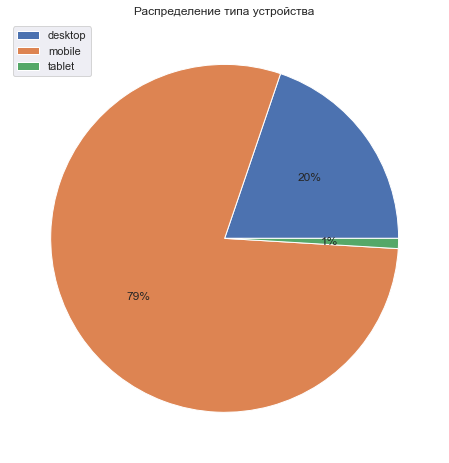

In [221]:
plt.figure(figsize=(12, 8))
plt.pie(df_device_category_amount.amount, labels=df_device_category_amount.device_category, labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение типа устройства")
plt.legend()
plt.show();

In [237]:
sns.heatmap(df_united_clean.pivot(index='device_category', columns='city', values='from_smm'))

ValueError: Index contains duplicate entries, cannot reshape

In [235]:
df_united_clean

,target,utm_medium,utm_campaign,device_category,device_browser,city,car_brand,car_model,from_smm
0,0,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Chrome,Gelendzhik,empty,empty,1
1,0,(none),LTuZkdKfxRGVceoWkVyg,mobile,Samsung Internet,Voronezh,empty,empty,0
2,0,banner,gecBYcKZCPMcVYdSSzKP,mobile,Chrome,Cherkessk,lada-vaz,vesta,0
3,0,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Chrome,Irkutsk,empty,empty,0
4,0,(none),LTuZkdKfxRGVceoWkVyg,mobile,Safari,Moscow,empty,empty,0
...,...,...,...,...,...,...,...,...,...
1682342,0,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Chrome,Moscow,empty,empty,1
1682343,0,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Safari,Saint Petersburg,empty,empty,0
1682344,0,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Chrome,Nizhny Novgorod,empty,empty,0
1682345,0,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Samsung Internet,Chelyabinsk,empty,empty,0


In [226]:
df_united_clean.columns

Index(['index', 'target', 'utm_medium', 'utm_campaign', 'device_category',
       'device_browser', 'city', 'car_brand', 'car_model', 'from_smm'],
      dtype='object')

In [244]:
# df_united_clean.pivot(index='device_category', columns='city', values='target')
pd.pivot_table(df_united_clean,
               index=["device_category"],
               values=["target"],
               columns=["city"],
               aggfunc=sum)

target                                                 \
city            (not set) 13403 14076 24130 39404 53425 75709 83709 8756   
device_category                                                            
desktop               427     0     0     0     0     0     0     0    0   
mobile                913     0     0     0     0     3     0     0    0   
tablet                 21     0     0     0     0     0     0     0    0   

                       ...                                            \
city            88040  ... Zheleznodorozhny Zheleznogorsk Zhigulevsk   
device_category        ...                                             
desktop             0  ...               29             3          0   
mobile              0  ...               73             0          0   
tablet              0  ...                1             0          0   

                                                                     \
city            Zhukovskiy Zlatoust Znamenskiy Zvenigorod Тарасовка   
device_category                                                       
desktop                 11        0          0          7         0   
mobile                  27        3          0         22         0   
tablet                   1        0          0          0         0   

                                     
city            Тимофеевка Хомутово  
device_category                      
desktop                  0        0  
mobile                   1        3  
tablet                   0        0  

[3 rows x 505 columns]